# Architectures For Big Data
## Second Challenge

### Valerio Cislaghi (mat. 982330)
### Leonardo Menti (mat. 982296)

In [1]:
from operator import add
from math import sqrt
import matplotlib.pylab as plt

In [2]:
path_files = 'books'
def get_path(file):
    return f"{path_files}/{file}"         

# choose a book
interested_book = "Iron-Man.txt"
books_to_compare = {
    'Avengers.txt',
    'Dickens-Great-Expectations.txt',
    'Dickens-Some-Christmas-Stories.txt',
    'Dickens-Three-Ghost-Stories.txt',
    'Divina-Commedia.txt',
    'Doctor-Strange.txt',
    'Harry-Potter1.txt',
    'Iron-Man2.txt',
    'Iron-Man3.txt',
    'Odissea.txt',
    'The-Hunger-Games-Catching-Fire.txt',
    'The-Hunger-Games-Mockingjay-part1.txt',
    'The-Hunger-Games-Mockingjay-part2.txt',
    'The-Hunger-Games.txt',
    'Thor.txt'
}

### Cosine Similarity


In [6]:
def cosine_factory(text1_path):
    rdd1 = sc.textFile(text1_path)\
        .flatMap(str.split)\
        .map(lambda x: (x.lower(),1))\
        .reduceByKey(add)
    
    def cosine_factory_aux(text2_path):
        rdd2 = sc.textFile(text2_path)\
            .flatMap(str.split)\
            .map(lambda x: (x.lower(),1))\
            .reduceByKey(add)
        
        num = rdd1.join(rdd2).mapValues(lambda x: x[0] * x[1]).values().sum()

        den_couple = rdd1\
            .fullOuterJoin(rdd2)\
            .values()\
            .map(lambda x: (pow(x[0], 2) if x[0] != None else 0 , pow(x[1],2) if x[1] != None else 0))\
            .reduce(lambda acc, x: (acc[0] + x[0], acc[1] + x[1]))

        den = sqrt(den_couple[0] * den_couple[1])
        res = num/den
        return res
    return cosine_factory_aux

cosine_fun = cosine_factory(get_path(interested_book))

books = os.listdir(path_files)
books.remove(interested_book)

similarities = {file_name : cosine_fun(get_path(file_name)) for file_name in books }

sorted(similarities.items(), key=lambda x:x[1], reverse=True)

[('Iron-Man2.txt', 0.9810343517633136),
 ('Iron-Man3.txt', 0.9696692493238397),
 ('Thor.txt', 0.9036920349138693),
 ('Avengers.txt', 0.8830508375853394),
 ('Doctor-Strange.txt', 0.8762529136875805),
 ('The-Hunger-Games-Mockingjay-part1.txt', 0.7420233702509759),
 ('The-Hunger-Games-Mockingjay-part2.txt', 0.7400838854139032),
 ('The-Hunger-Games-Catching-Fire.txt', 0.7395056197497382),
 ('The-Hunger-Games.txt', 0.7318269718395928),
 ('Dickens-Great-Expectations.txt', 0.7205429404082178),
 ('Dickens-Three-Ghost-Stories.txt', 0.6979439940781341),
 ('Dickens-Some-Christmas-Stories.txt', 0.681767018298136),
 ('Lord-Of-The-Rings2.txt', 0.669880045067751),
 ('Lord-Of-The-Rings1.txt', 0.6654295199185915),
 ('Harry-Potter1.txt', 0.6632191884534964),
 ('Lord-Of-The-Rings3.txt', 0.6427541632266812),
 ('Odissea.txt', 0.12218817092228478),
 ('Divina-Commedia.txt', 0.09187994758357099)]

### Histogram

In [4]:
rdd = sc.textFile(get_path('Iron-Man.txt'))\
    .flatMap(str.split)

res = rdd.map(lambda x: (x, 1))\
    .reduceByKey(add)\
    .map(lambda x: (x[1], 1))\
    .reduceByKey(add)\
    .sortByKey()\
    .collect()
for key, value in res:
    print(key, ':', value)

1 : 1990
2 : 436
3 : 141
4 : 64
5 : 55
6 : 39
7 : 20
8 : 26
9 : 16
10 : 14
11 : 10
12 : 5
13 : 10
14 : 13
15 : 10
16 : 9
17 : 7
18 : 4
19 : 4
20 : 4
21 : 4
22 : 4
23 : 2
24 : 6
25 : 3
26 : 1
27 : 4
30 : 5
31 : 3
32 : 2
33 : 3
38 : 1
41 : 1
44 : 3
48 : 3
49 : 1
50 : 1
54 : 2
55 : 1
56 : 1
57 : 2
59 : 3
62 : 1
64 : 1
73 : 1
75 : 1
81 : 1
89 : 1
98 : 1
102 : 1
106 : 1
137 : 1
227 : 1
234 : 1
246 : 1
272 : 1
295 : 1
440 : 1


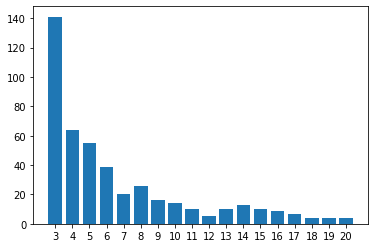

In [5]:
x, y = zip(*res[2:20])
plt.bar(x, y, align='center')
plt.xticks(x)
plt.show()